170498071/170498071 [==============================] - 11s 0us/step


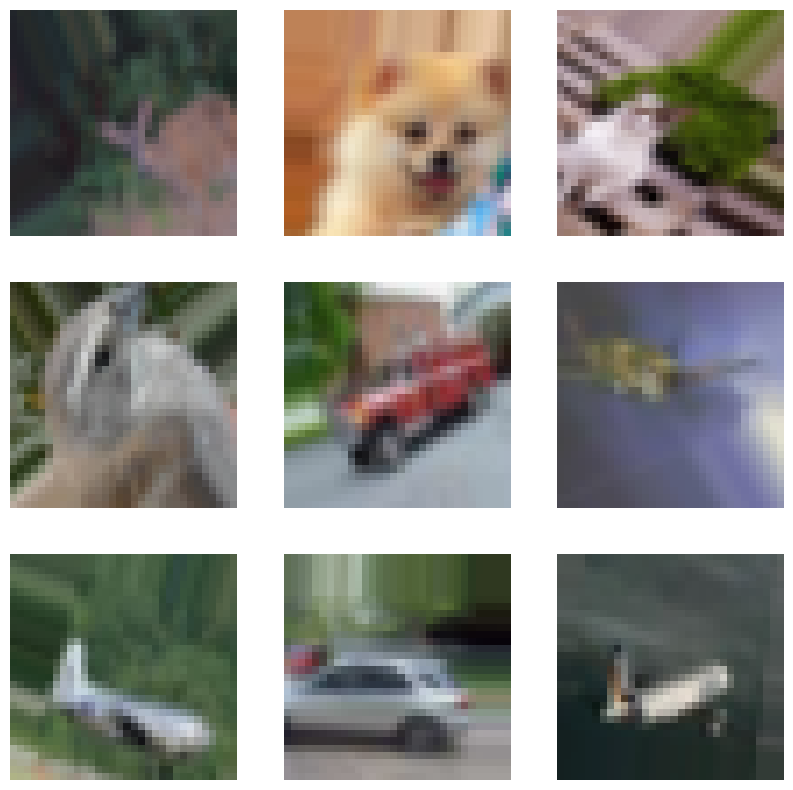

In [ ]:
import numpy as np # array
from keras.datasets import cifar10 # importing in built dataset
from keras.preprocessing.image import ImageDataGenerator # to generate iamges
import matplotlib.pyplot as plt # visualizing

(x_train, y_train), (_, _) = cifar10.load_data() # loading only the training dataset

x_train = x_train.astype('float32') # converting images to float values
x_train /= 255 #normalizing

datagen = ImageDataGenerator( #changes to be done for newly generated data
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest') # to fill the missing pixels by duplicating/copying the nearest pixel

datagen.fit(x_train)

augmented_images = [next(datagen.flow(x_train, batch_size=1))[0] for _ in range(9)] # next = used to ensure to generate next image
# batch size 1 = to generate 1 image at a time

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i])
    plt.axis("off")
plt.show()


In [ ]:
augmented_images = np.array([next(datagen.flow(x_train, batch_size=1))[0] for _ in range(len(x_train))])
#range = xtrain . if xtrain is 1000 images ,1000 augmented images will be generated
x_train_augmented = np.concatenate((x_train, augmented_images), axis=0) #append the augmented images with the dataset
y_train_augmented = np.concatenate((y_train, y_train), axis=0) # target variable will be duplicated and appended